# Python imports

In [1]:
from n2v.models import N2VConfig, N2V
import numpy as np
import random
from csbdeep.utils import plot_history, Path
from n2v.utils.n2v_utils import manipulate_val_data
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
from matplotlib import pyplot as plt
from tifffile import imread, TiffFile

import urllib
import os
import zipfile

Using TensorFlow backend.


Where the data is

In [2]:
base_dir = r'X:\SaricLab\Tina_dataset'

base_path = Path(base_dir)
raw_files = sorted(Path(base_path/r'raw data').rglob('*.tif'))
print(f'There are {len(raw_files)} files to analyse!')

n2v_train_dir = base_path/f'n2v train'
n2v_train_dir.mkdir(exist_ok=True)

n2v_val_dir = base_path/f'n2v validation'
n2v_val_dir.mkdir(exist_ok=True)

##n2v_model_dir = base_path/f'models'
##n2v_model_dir.mkdir(exist_ok=True)

There are 1 files to analyse!


Get image information

In [3]:
ims = []

for file in raw_files:
    T = imread(str(file))
    print(f'T has shape {T.shape}')
    ims.append(T)

T has shape (106, 1200, 1200)


Create training and validation patches - assume only one channel for now

In [9]:
patch_size = 128
n_patch_train = 500
n_patch_val = 50

X = []
X_val = []

for n in range(n_patch_train):
    im = random.choice(ims)
    frame = random.choice(range(im.shape[0]))
    x_start = random.choice(range(im.shape[1]-patch_size))
    y_start = random.choice(range(im.shape[2]-patch_size))
    X.append(im[frame][x_start:x_start+patch_size, y_start:y_start+patch_size])
    
for n in range(n_patch_val):
    im = random.choice(ims)
    frame = random.choice(range(im.shape[0]))
    x_start = random.choice(range(im.shape[1]-patch_size))
    y_start = random.choice(range(im.shape[2]-patch_size))
    X_val.append(im[frame][x_start:x_start+patch_size, y_start:y_start+patch_size])
    
X = np.array(X)
X_val = np.array(X_val)

# add channel dimension for n2v
X = X[..., np.newaxis]
X_val = X_val[..., np.newaxis]

Preview training and validation

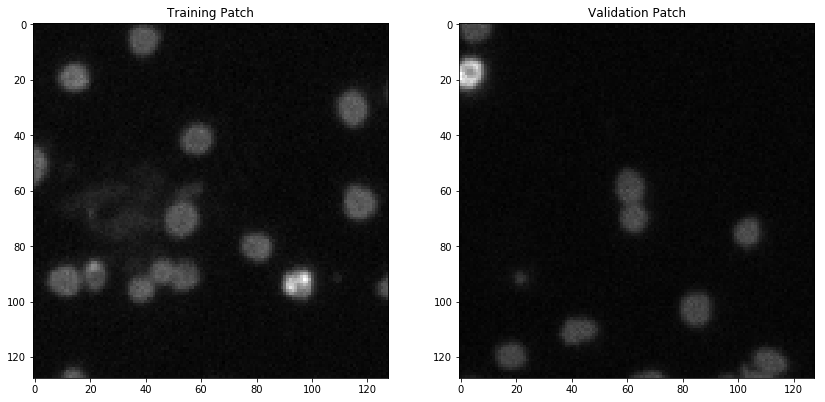

In [10]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(X[0,...,0], cmap='gray')
plt.title('Training Patch');
plt.subplot(1,2,2)
plt.imshow(X_val[0,...,0], cmap='gray')
plt.title('Validation Patch');

Prepare for n2v

In [11]:
config = N2VConfig(X, unet_kern_size=3, 
                   train_steps_per_epoch=400, train_epochs=200, train_loss='mse', batch_norm=True, 
                   train_batch_size=128, n2v_perc_pix=0.198, n2v_patch_shape=(64, 64), 
                   unet_n_first = 96,
                   unet_residual = True,
                   n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=2)

# Let's look at the parameters stored in the config-object.
vars(config)

{'means': ['179.09979064941408'],
 'stds': ['80.91949775939011'],
 'n_dim': 2,
 'axes': 'YXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'unet_residual': True,
 'unet_n_depth': 2,
 'unet_kern_size': 3,
 'unet_n_first': 96,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, 1),
 'train_loss': 'mse',
 'train_epochs': 200,
 'train_steps_per_epoch': 400,
 'train_learning_rate': 0.0004,
 'train_batch_size': 128,
 'train_tensorboard': True,
 'train_checkpoint': 'weights_best.h5',
 'train_reduce_lr': {'factor': 0.5, 'patience': 10},
 'batch_norm': True,
 'n2v_perc_pix': 0.198,
 'n2v_patch_shape': (64, 64),
 'n2v_manipulator': 'uniform_withCP',
 'n2v_neighborhood_radius': 2,
 'probabilistic': False}

In [12]:
# a name used to identify the model
model_name = 'Tina_test'
# We are now creating our network model.
model = N2V(config, model_name, basedir='models')
model.prepare_for_training(metrics=())

C:\Users\SC\Anaconda3\lib\site-packages\n2v\models\n2v_standard.py:409: UserWarning: output path for model already exists, files may be overwritten: C:\Users\SC\uwecode\archaea_tools\models\Tina_test
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))


Train model

In [ ]:
history = model.train(X, X_val)

Preparing validation data: 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 746.68it/s]


Epoch 1/200


299/400 [=====================>........] - ETA: 2:03:08 - loss: 1.82 - ETA: 1:55:11 - loss: 1.74 - ETA: 1:56:19 - loss: 1.35 - ETA: 1:56:53 - loss: 1.12 - ETA: 1:55:08 - loss: 0.97 - ETA: 1:56:23 - loss: 0.86 - ETA: 1:57:34 - loss: 0.77 - ETA: 1:57:59 - loss: 0.69 - ETA: 1:57:58 - loss: 0.63 - ETA: 1:57:40 - loss: 0.58 - ETA: 1:57:39 - loss: 0.54 - ETA: 1:56:44 - loss: 0.50 - ETA: 1:55:27 - loss: 0.47 - ETA: 1:55:03 - loss: 0.44 - ETA: 1:54:47 - loss: 0.42 - ETA: 1:54:30 - loss: 0.40 - ETA: 1:54:09 - loss: 0.38 - ETA: 1:53:13 - loss: 0.36 - ETA: 1:52:55 - loss: 0.35 - ETA: 1:52:45 - loss: 0.33 - ETA: 1:52:25 - loss: 0.32 - ETA: 1:52:08 - loss: 0.31 - ETA: 1:51:57 - loss: 0.30 - ETA: 1:51:12 - loss: 0.28 - ETA: 1:50:25 - loss: 0.28 - ETA: 1:50:05 - loss: 0.27 - ETA: 1:49:49 - loss: 0.26 - ETA: 1:49:33 - loss: 0.25 - ETA: 1:48:53 - loss: 0.24 - ETA: 1:48:35 - loss: 0.24 - ETA: 1:48:20 - loss: 0.23 - ETA: 1:48:05 - loss: 0.22 - ETA: 1:47:34 - loss: 0.22 - ETA: 1:47:18 - loss: 0.21 - ETA: 

400/400 [==============================] - ETA: 28:47 - loss: 0.04 - ETA: 28:29 - loss: 0.04 - ETA: 28:12 - loss: 0.04 - ETA: 27:55 - loss: 0.04 - ETA: 27:38 - loss: 0.04 - ETA: 27:21 - loss: 0.04 - ETA: 27:03 - loss: 0.04 - ETA: 26:46 - loss: 0.04 - ETA: 26:29 - loss: 0.04 - ETA: 26:11 - loss: 0.04 - ETA: 25:54 - loss: 0.04 - ETA: 25:36 - loss: 0.04 - ETA: 25:19 - loss: 0.04 - ETA: 25:02 - loss: 0.04 - ETA: 24:44 - loss: 0.04 - ETA: 24:27 - loss: 0.04 - ETA: 24:10 - loss: 0.04 - ETA: 23:53 - loss: 0.04 - ETA: 23:35 - loss: 0.04 - ETA: 23:18 - loss: 0.04 - ETA: 23:01 - loss: 0.04 - ETA: 22:44 - loss: 0.04 - ETA: 22:26 - loss: 0.04 - ETA: 22:09 - loss: 0.04 - ETA: 21:52 - loss: 0.04 - ETA: 21:35 - loss: 0.04 - ETA: 21:17 - loss: 0.04 - ETA: 21:00 - loss: 0.04 - ETA: 20:43 - loss: 0.04 - ETA: 20:25 - loss: 0.04 - ETA: 20:08 - loss: 0.04 - ETA: 19:51 - loss: 0.04 - ETA: 19:33 - loss: 0.04 - ETA: 19:16 - loss: 0.04 - ETA: 18:59 - loss: 0.04 - ETA: 18:42 - loss: 0.04 - ETA: 18:24 - loss: 0.

W0305 18:17:02.277243 13060 module_wrapper.py:139] From C:\Users\SC\Anaconda3\lib\site-packages\n2v\models\n2v_standard.py:300: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.



Epoch 2/200


299/400 [=====================>........] - ETA: 1:57:22 - loss: 0.02 - ETA: 1:51:47 - loss: 0.01 - ETA: 1:53:14 - loss: 0.01 - ETA: 1:54:01 - loss: 0.02 - ETA: 1:54:13 - loss: 0.01 - ETA: 1:54:14 - loss: 0.02 - ETA: 1:52:38 - loss: 0.01 - ETA: 1:52:45 - loss: 0.01 - ETA: 1:52:47 - loss: 0.01 - ETA: 1:51:38 - loss: 0.01 - ETA: 1:51:36 - loss: 0.01 - ETA: 1:51:36 - loss: 0.01 - ETA: 1:51:30 - loss: 0.01 - ETA: 1:51:22 - loss: 0.01 - ETA: 1:50:32 - loss: 0.01 - ETA: 1:50:24 - loss: 0.01 - ETA: 1:49:36 - loss: 0.01 - ETA: 1:49:32 - loss: 0.01 - ETA: 1:49:22 - loss: 0.01 - ETA: 1:49:15 - loss: 0.01 - ETA: 1:49:03 - loss: 0.01 - ETA: 1:48:23 - loss: 0.01 - ETA: 1:48:11 - loss: 0.01 - ETA: 1:48:05 - loss: 0.01 - ETA: 1:47:52 - loss: 0.01 - ETA: 1:47:38 - loss: 0.01 - ETA: 1:47:26 - loss: 0.01 - ETA: 1:46:54 - loss: 0.01 - ETA: 1:46:42 - loss: 0.01 - ETA: 1:46:09 - loss: 0.01 - ETA: 1:45:57 - loss: 0.01 - ETA: 1:45:45 - loss: 0.01 - ETA: 1:45:12 - loss: 0.01 - ETA: 1:44:59 - loss: 0.01 - ETA: 

400/400 [==============================] - ETA: 28:48 - loss: 0.01 - ETA: 28:30 - loss: 0.01 - ETA: 28:13 - loss: 0.01 - ETA: 27:56 - loss: 0.01 - ETA: 27:38 - loss: 0.01 - ETA: 27:21 - loss: 0.01 - ETA: 27:04 - loss: 0.01 - ETA: 26:47 - loss: 0.01 - ETA: 26:29 - loss: 0.01 - ETA: 26:11 - loss: 0.01 - ETA: 25:54 - loss: 0.01 - ETA: 25:37 - loss: 0.01 - ETA: 25:20 - loss: 0.01 - ETA: 25:03 - loss: 0.01 - ETA: 24:46 - loss: 0.01 - ETA: 24:28 - loss: 0.01 - ETA: 24:11 - loss: 0.01 - ETA: 23:54 - loss: 0.01 - ETA: 23:36 - loss: 0.01 - ETA: 23:19 - loss: 0.01 - ETA: 23:02 - loss: 0.01 - ETA: 22:44 - loss: 0.01 - ETA: 22:27 - loss: 0.01 - ETA: 22:09 - loss: 0.01 - ETA: 21:52 - loss: 0.01 - ETA: 21:35 - loss: 0.01 - ETA: 21:18 - loss: 0.01 - ETA: 21:00 - loss: 0.01 - ETA: 20:43 - loss: 0.01 - ETA: 20:26 - loss: 0.01 - ETA: 20:08 - loss: 0.01 - ETA: 19:51 - loss: 0.01 - ETA: 19:34 - loss: 0.01 - ETA: 19:17 - loss: 0.01 - ETA: 19:00 - loss: 0.01 - ETA: 18:42 - loss: 0.01 - ETA: 18:25 - loss: 0.

299/400 [=====================>........] - ETA: 1:57:51 - loss: 0.02 - ETA: 1:51:47 - loss: 0.02 - ETA: 1:53:08 - loss: 0.01 - ETA: 1:53:35 - loss: 0.01 - ETA: 1:51:26 - loss: 0.01 - ETA: 1:51:49 - loss: 0.01 - ETA: 1:52:00 - loss: 0.01 - ETA: 1:52:15 - loss: 0.01 - ETA: 1:52:15 - loss: 0.01 - ETA: 1:52:13 - loss: 0.01 - ETA: 1:52:05 - loss: 0.01 - ETA: 1:51:11 - loss: 0.01 - ETA: 1:51:05 - loss: 0.01 - ETA: 1:51:03 - loss: 0.01 - ETA: 1:50:53 - loss: 0.01 - ETA: 1:50:08 - loss: 0.01 - ETA: 1:49:21 - loss: 0.01 - ETA: 1:49:11 - loss: 0.01 - ETA: 1:49:02 - loss: 0.01 - ETA: 1:48:54 - loss: 0.01 - ETA: 1:48:15 - loss: 0.01 - ETA: 1:48:05 - loss: 0.01 - ETA: 1:47:56 - loss: 0.01 - ETA: 1:47:48 - loss: 0.01 - ETA: 1:47:36 - loss: 0.01 - ETA: 1:46:59 - loss: 0.01 - ETA: 1:46:48 - loss: 0.01 - ETA: 1:46:38 - loss: 0.01 - ETA: 1:46:04 - loss: 0.01 - ETA: 1:45:53 - loss: 0.01 - ETA: 1:45:40 - loss: 0.01 - ETA: 1:45:29 - loss: 0.01 - ETA: 1:45:16 - loss: 0.01 - ETA: 1:45:03 - loss: 0.01 - ETA: 

400/400 [==============================] - ETA: 28:42 - loss: 0.01 - ETA: 28:25 - loss: 0.01 - ETA: 28:07 - loss: 0.01 - ETA: 27:50 - loss: 0.01 - ETA: 27:33 - loss: 0.01 - ETA: 27:16 - loss: 0.01 - ETA: 26:59 - loss: 0.01 - ETA: 26:41 - loss: 0.01 - ETA: 26:24 - loss: 0.01 - ETA: 26:07 - loss: 0.01 - ETA: 25:50 - loss: 0.01 - ETA: 25:33 - loss: 0.01 - ETA: 25:16 - loss: 0.01 - ETA: 24:59 - loss: 0.01 - ETA: 24:41 - loss: 0.01 - ETA: 24:24 - loss: 0.01 - ETA: 24:07 - loss: 0.01 - ETA: 23:50 - loss: 0.01 - ETA: 23:32 - loss: 0.01 - ETA: 23:15 - loss: 0.01 - ETA: 22:58 - loss: 0.01 - ETA: 22:41 - loss: 0.01 - ETA: 22:23 - loss: 0.01 - ETA: 22:06 - loss: 0.01 - ETA: 21:49 - loss: 0.01 - ETA: 21:32 - loss: 0.01 - ETA: 21:15 - loss: 0.01 - ETA: 20:57 - loss: 0.01 - ETA: 20:40 - loss: 0.01 - ETA: 20:23 - loss: 0.01 - ETA: 20:06 - loss: 0.01 - ETA: 19:48 - loss: 0.01 - ETA: 19:31 - loss: 0.01 - ETA: 19:14 - loss: 0.01 - ETA: 18:57 - loss: 0.01 - ETA: 18:39 - loss: 0.01 - ETA: 18:22 - loss: 0.

299/400 [=====================>........] - ETA: 1:57:53 - loss: 0.01 - ETA: 1:57:31 - loss: 0.01 - ETA: 1:53:39 - loss: 0.01 - ETA: 1:54:24 - loss: 0.01 - ETA: 1:52:22 - loss: 0.01 - ETA: 1:52:39 - loss: 0.01 - ETA: 1:53:40 - loss: 0.01 - ETA: 1:53:46 - loss: 0.01 - ETA: 1:53:43 - loss: 0.01 - ETA: 1:53:33 - loss: 0.01 - ETA: 1:53:29 - loss: 0.01 - ETA: 1:52:27 - loss: 0.01 - ETA: 1:52:20 - loss: 0.01 - ETA: 1:52:04 - loss: 0.01 - ETA: 1:51:09 - loss: 0.01 - ETA: 1:51:04 - loss: 0.01 - ETA: 1:50:15 - loss: 0.01 - ETA: 1:50:03 - loss: 0.01 - ETA: 1:49:54 - loss: 0.01 - ETA: 1:49:53 - loss: 0.01 - ETA: 1:50:14 - loss: 0.01 - ETA: 1:49:44 - loss: 0.01 - ETA: 1:49:42 - loss: 0.01 - ETA: 1:49:36 - loss: 0.01 - ETA: 1:49:07 - loss: 0.01 - ETA: 1:48:59 - loss: 0.01 - ETA: 1:48:44 - loss: 0.01 - ETA: 1:48:30 - loss: 0.01 - ETA: 1:48:22 - loss: 0.01 - ETA: 1:48:07 - loss: 0.01 - ETA: 1:47:31 - loss: 0.01 - ETA: 1:47:19 - loss: 0.01 - ETA: 1:47:05 - loss: 0.01 - ETA: 1:46:33 - loss: 0.01 - ETA: 

400/400 [==============================] - ETA: 28:52 - loss: 0.01 - ETA: 28:34 - loss: 0.01 - ETA: 28:17 - loss: 0.01 - ETA: 28:00 - loss: 0.01 - ETA: 27:42 - loss: 0.01 - ETA: 27:25 - loss: 0.01 - ETA: 27:08 - loss: 0.01 - ETA: 26:50 - loss: 0.01 - ETA: 26:33 - loss: 0.01 - ETA: 26:16 - loss: 0.01 - ETA: 25:59 - loss: 0.01 - ETA: 25:41 - loss: 0.01 - ETA: 25:24 - loss: 0.01 - ETA: 25:06 - loss: 0.01 - ETA: 24:49 - loss: 0.01 - ETA: 24:32 - loss: 0.01 - ETA: 24:14 - loss: 0.01 - ETA: 23:57 - loss: 0.01 - ETA: 23:39 - loss: 0.01 - ETA: 23:22 - loss: 0.01 - ETA: 23:05 - loss: 0.01 - ETA: 22:48 - loss: 0.01 - ETA: 22:31 - loss: 0.01 - ETA: 22:13 - loss: 0.01 - ETA: 21:56 - loss: 0.01 - ETA: 21:39 - loss: 0.01 - ETA: 21:21 - loss: 0.01 - ETA: 21:04 - loss: 0.01 - ETA: 20:46 - loss: 0.01 - ETA: 20:29 - loss: 0.01 - ETA: 20:12 - loss: 0.01 - ETA: 19:54 - loss: 0.01 - ETA: 19:37 - loss: 0.01 - ETA: 19:20 - loss: 0.01 - ETA: 19:03 - loss: 0.01 - ETA: 18:45 - loss: 0.01 - ETA: 18:28 - loss: 0.

299/400 [=====================>........] - ETA: 1:58:11 - loss: 0.01 - ETA: 1:52:10 - loss: 0.01 - ETA: 1:53:50 - loss: 0.01 - ETA: 1:54:32 - loss: 0.01 - ETA: 1:54:28 - loss: 0.01 - ETA: 1:54:31 - loss: 0.01 - ETA: 1:52:48 - loss: 0.01 - ETA: 1:53:33 - loss: 0.01 - ETA: 1:53:24 - loss: 0.01 - ETA: 1:53:16 - loss: 0.01 - ETA: 1:52:05 - loss: 0.01 - ETA: 1:52:08 - loss: 0.01 - ETA: 1:52:03 - loss: 0.01 - ETA: 1:51:55 - loss: 0.01 - ETA: 1:51:45 - loss: 0.01 - ETA: 1:50:57 - loss: 0.01 - ETA: 1:50:46 - loss: 0.01 - ETA: 1:49:58 - loss: 0.01 - ETA: 1:49:49 - loss: 0.01 - ETA: 1:49:42 - loss: 0.01 - ETA: 1:49:30 - loss: 0.01 - ETA: 1:49:24 - loss: 0.01 - ETA: 1:49:10 - loss: 0.01 - ETA: 1:48:35 - loss: 0.01 - ETA: 1:48:23 - loss: 0.01 - ETA: 1:47:46 - loss: 0.01 - ETA: 1:47:37 - loss: 0.01 - ETA: 1:47:27 - loss: 0.01 - ETA: 1:47:14 - loss: 0.01 - ETA: 1:47:01 - loss: 0.01 - ETA: 1:46:47 - loss: 0.01 - ETA: 1:46:14 - loss: 0.01 - ETA: 1:46:01 - loss: 0.01 - ETA: 1:45:47 - loss: 0.01 - ETA: 

400/400 [==============================] - ETA: 28:51 - loss: 0.01 - ETA: 28:33 - loss: 0.01 - ETA: 28:16 - loss: 0.01 - ETA: 27:58 - loss: 0.01 - ETA: 27:41 - loss: 0.01 - ETA: 27:24 - loss: 0.01 - ETA: 27:07 - loss: 0.01 - ETA: 26:49 - loss: 0.01 - ETA: 26:32 - loss: 0.01 - ETA: 26:15 - loss: 0.01 - ETA: 25:57 - loss: 0.01 - ETA: 25:40 - loss: 0.01 - ETA: 25:23 - loss: 0.01 - ETA: 25:05 - loss: 0.01 - ETA: 24:48 - loss: 0.01 - ETA: 24:30 - loss: 0.01 - ETA: 24:13 - loss: 0.01 - ETA: 23:56 - loss: 0.01 - ETA: 23:39 - loss: 0.01 - ETA: 23:22 - loss: 0.01 - ETA: 23:04 - loss: 0.01 - ETA: 22:46 - loss: 0.01 - ETA: 22:29 - loss: 0.01 - ETA: 22:12 - loss: 0.01 - ETA: 21:55 - loss: 0.01 - ETA: 21:37 - loss: 0.01 - ETA: 21:20 - loss: 0.01 - ETA: 21:03 - loss: 0.01 - ETA: 20:45 - loss: 0.01 - ETA: 20:28 - loss: 0.01 - ETA: 20:11 - loss: 0.01 - ETA: 19:53 - loss: 0.01 - ETA: 19:36 - loss: 0.01 - ETA: 19:19 - loss: 0.01 - ETA: 19:01 - loss: 0.01 - ETA: 18:44 - loss: 0.01 - ETA: 18:27 - loss: 0.

299/400 [=====================>........] - ETA: 1:56:25 - loss: 0.01 - ETA: 1:56:23 - loss: 0.01 - ETA: 1:56:15 - loss: 0.01 - ETA: 1:53:32 - loss: 0.01 - ETA: 1:51:35 - loss: 0.01 - ETA: 1:51:56 - loss: 0.01 - ETA: 1:52:07 - loss: 0.01 - ETA: 1:52:20 - loss: 0.01 - ETA: 1:51:06 - loss: 0.01 - ETA: 1:51:07 - loss: 0.01 - ETA: 1:51:09 - loss: 0.01 - ETA: 1:51:12 - loss: 0.01 - ETA: 1:51:05 - loss: 0.01 - ETA: 1:50:56 - loss: 0.01 - ETA: 1:50:43 - loss: 0.01 - ETA: 1:49:55 - loss: 0.01 - ETA: 1:49:46 - loss: 0.01 - ETA: 1:49:37 - loss: 0.01 - ETA: 1:49:30 - loss: 0.01 - ETA: 1:48:52 - loss: 0.01 - ETA: 1:48:38 - loss: 0.01 - ETA: 1:48:26 - loss: 0.01 - ETA: 1:48:18 - loss: 0.01 - ETA: 1:47:42 - loss: 0.01 - ETA: 1:47:32 - loss: 0.01 - ETA: 1:47:19 - loss: 0.01 - ETA: 1:46:44 - loss: 0.01 - ETA: 1:46:34 - loss: 0.01 - ETA: 1:46:01 - loss: 0.01 - ETA: 1:45:48 - loss: 0.01 - ETA: 1:45:35 - loss: 0.01 - ETA: 1:45:27 - loss: 0.01 - ETA: 1:45:13 - loss: 0.01 - ETA: 1:44:59 - loss: 0.01 - ETA: 

400/400 [==============================] - ETA: 28:41 - loss: 0.01 - ETA: 28:23 - loss: 0.01 - ETA: 28:06 - loss: 0.01 - ETA: 27:49 - loss: 0.01 - ETA: 27:32 - loss: 0.01 - ETA: 27:15 - loss: 0.01 - ETA: 26:57 - loss: 0.01 - ETA: 26:40 - loss: 0.01 - ETA: 26:23 - loss: 0.01 - ETA: 26:06 - loss: 0.01 - ETA: 25:49 - loss: 0.01 - ETA: 25:32 - loss: 0.01 - ETA: 25:14 - loss: 0.01 - ETA: 24:56 - loss: 0.01 - ETA: 24:39 - loss: 0.01 - ETA: 24:22 - loss: 0.01 - ETA: 24:05 - loss: 0.01 - ETA: 23:48 - loss: 0.01 - ETA: 23:31 - loss: 0.01 - ETA: 23:13 - loss: 0.01 - ETA: 22:56 - loss: 0.01 - ETA: 22:39 - loss: 0.01 - ETA: 22:22 - loss: 0.01 - ETA: 22:05 - loss: 0.01 - ETA: 21:47 - loss: 0.01 - ETA: 21:30 - loss: 0.01 - ETA: 21:13 - loss: 0.01 - ETA: 20:56 - loss: 0.01 - ETA: 20:39 - loss: 0.01 - ETA: 20:21 - loss: 0.01 - ETA: 20:04 - loss: 0.01 - ETA: 19:47 - loss: 0.01 - ETA: 19:30 - loss: 0.01 - ETA: 19:12 - loss: 0.01 - ETA: 18:55 - loss: 0.01 - ETA: 18:38 - loss: 0.01 - ETA: 18:21 - loss: 0.

299/400 [=====================>........] - ETA: 1:45:47 - loss: 0.01 - ETA: 1:51:01 - loss: 0.01 - ETA: 1:52:28 - loss: 0.01 - ETA: 1:53:39 - loss: 0.01 - ETA: 1:54:06 - loss: 0.01 - ETA: 1:54:07 - loss: 0.01 - ETA: 1:53:55 - loss: 0.01 - ETA: 1:52:32 - loss: 0.01 - ETA: 1:52:29 - loss: 0.01 - ETA: 1:52:19 - loss: 0.01 - ETA: 1:51:14 - loss: 0.01 - ETA: 1:51:16 - loss: 0.01 - ETA: 1:51:09 - loss: 0.01 - ETA: 1:50:57 - loss: 0.01 - ETA: 1:50:04 - loss: 0.01 - ETA: 1:50:01 - loss: 0.01 - ETA: 1:49:51 - loss: 0.01 - ETA: 1:49:46 - loss: 0.01 - ETA: 1:48:59 - loss: 0.01 - ETA: 1:48:53 - loss: 0.01 - ETA: 1:48:43 - loss: 0.01 - ETA: 1:48:31 - loss: 0.01 - ETA: 1:47:53 - loss: 0.01 - ETA: 1:47:44 - loss: 0.01 - ETA: 1:47:32 - loss: 0.01 - ETA: 1:47:20 - loss: 0.01 - ETA: 1:47:08 - loss: 0.01 - ETA: 1:46:35 - loss: 0.01 - ETA: 1:46:03 - loss: 0.01 - ETA: 1:45:52 - loss: 0.01 - ETA: 1:45:40 - loss: 0.01 - ETA: 1:45:32 - loss: 0.01 - ETA: 1:45:00 - loss: 0.01 - ETA: 1:44:48 - loss: 0.01 - ETA: 

400/400 [==============================] - ETA: 28:43 - loss: 0.01 - ETA: 28:26 - loss: 0.01 - ETA: 28:08 - loss: 0.01 - ETA: 27:51 - loss: 0.01 - ETA: 27:34 - loss: 0.01 - ETA: 27:17 - loss: 0.01 - ETA: 26:59 - loss: 0.01 - ETA: 26:42 - loss: 0.01 - ETA: 26:25 - loss: 0.01 - ETA: 26:08 - loss: 0.01 - ETA: 25:51 - loss: 0.01 - ETA: 25:34 - loss: 0.01 - ETA: 25:16 - loss: 0.01 - ETA: 24:59 - loss: 0.01 - ETA: 24:41 - loss: 0.01 - ETA: 24:24 - loss: 0.01 - ETA: 24:07 - loss: 0.01 - ETA: 23:50 - loss: 0.01 - ETA: 23:33 - loss: 0.01 - ETA: 23:15 - loss: 0.01 - ETA: 22:58 - loss: 0.01 - ETA: 22:41 - loss: 0.01 - ETA: 22:24 - loss: 0.01 - ETA: 22:06 - loss: 0.01 - ETA: 21:49 - loss: 0.01 - ETA: 21:32 - loss: 0.01 - ETA: 21:15 - loss: 0.01 - ETA: 20:58 - loss: 0.01 - ETA: 20:40 - loss: 0.01 - ETA: 20:23 - loss: 0.01 - ETA: 20:06 - loss: 0.01 - ETA: 19:49 - loss: 0.01 - ETA: 19:32 - loss: 0.01 - ETA: 19:14 - loss: 0.01 - ETA: 18:57 - loss: 0.01 - ETA: 18:40 - loss: 0.01 - ETA: 18:23 - loss: 0.

299/400 [=====================>........] - ETA: 1:56:52 - loss: 0.01 - ETA: 1:56:26 - loss: 0.01 - ETA: 1:52:27 - loss: 0.01 - ETA: 1:53:09 - loss: 0.01 - ETA: 1:51:20 - loss: 0.01 - ETA: 1:51:41 - loss: 0.01 - ETA: 1:52:00 - loss: 0.01 - ETA: 1:52:08 - loss: 0.01 - ETA: 1:52:12 - loss: 0.01 - ETA: 1:51:04 - loss: 0.01 - ETA: 1:51:02 - loss: 0.01 - ETA: 1:51:12 - loss: 0.01 - ETA: 1:51:03 - loss: 0.01 - ETA: 1:50:56 - loss: 0.01 - ETA: 1:50:43 - loss: 0.01 - ETA: 1:50:01 - loss: 0.01 - ETA: 1:49:49 - loss: 0.01 - ETA: 1:49:37 - loss: 0.01 - ETA: 1:49:27 - loss: 0.01 - ETA: 1:48:49 - loss: 0.01 - ETA: 1:48:39 - loss: 0.01 - ETA: 1:48:28 - loss: 0.01 - ETA: 1:48:16 - loss: 0.01 - ETA: 1:47:40 - loss: 0.01 - ETA: 1:47:29 - loss: 0.01 - ETA: 1:47:16 - loss: 0.01 - ETA: 1:46:41 - loss: 0.01 - ETA: 1:46:31 - loss: 0.01 - ETA: 1:46:18 - loss: 0.01 - ETA: 1:46:04 - loss: 0.01 - ETA: 1:45:30 - loss: 0.01 - ETA: 1:45:19 - loss: 0.01 - ETA: 1:45:06 - loss: 0.01 - ETA: 1:44:54 - loss: 0.01 - ETA: 

400/400 [==============================] - ETA: 28:40 - loss: 0.01 - ETA: 28:23 - loss: 0.01 - ETA: 28:06 - loss: 0.01 - ETA: 27:49 - loss: 0.01 - ETA: 27:31 - loss: 0.01 - ETA: 27:14 - loss: 0.01 - ETA: 26:56 - loss: 0.01 - ETA: 26:39 - loss: 0.01 - ETA: 26:22 - loss: 0.01 - ETA: 26:05 - loss: 0.01 - ETA: 25:48 - loss: 0.01 - ETA: 25:30 - loss: 0.01 - ETA: 25:13 - loss: 0.01 - ETA: 24:56 - loss: 0.01 - ETA: 24:39 - loss: 0.01 - ETA: 24:22 - loss: 0.01 - ETA: 24:05 - loss: 0.01 - ETA: 23:47 - loss: 0.01 - ETA: 23:30 - loss: 0.01 - ETA: 23:13 - loss: 0.01 - ETA: 22:56 - loss: 0.01 - ETA: 22:39 - loss: 0.01 - ETA: 22:22 - loss: 0.01 - ETA: 22:04 - loss: 0.01 - ETA: 21:47 - loss: 0.01 - ETA: 21:29 - loss: 0.01 - ETA: 21:12 - loss: 0.01 - ETA: 20:55 - loss: 0.01 - ETA: 20:38 - loss: 0.01 - ETA: 20:21 - loss: 0.01 - ETA: 20:04 - loss: 0.01 - ETA: 19:47 - loss: 0.01 - ETA: 19:29 - loss: 0.01 - ETA: 19:12 - loss: 0.01 - ETA: 18:55 - loss: 0.01 - ETA: 18:38 - loss: 0.01 - ETA: 18:21 - loss: 0.

299/400 [=====================>........] - ETA: 1:56:57 - loss: 0.01 - ETA: 1:57:13 - loss: 0.01 - ETA: 1:52:55 - loss: 0.01 - ETA: 1:53:44 - loss: 0.01 - ETA: 1:53:48 - loss: 0.01 - ETA: 1:51:56 - loss: 0.01 - ETA: 1:52:07 - loss: 0.01 - ETA: 1:52:15 - loss: 0.01 - ETA: 1:52:21 - loss: 0.01 - ETA: 1:52:16 - loss: 0.01 - ETA: 1:51:10 - loss: 0.01 - ETA: 1:51:13 - loss: 0.01 - ETA: 1:50:18 - loss: 0.01 - ETA: 1:50:13 - loss: 0.01 - ETA: 1:50:10 - loss: 0.01 - ETA: 1:50:08 - loss: 0.01 - ETA: 1:50:00 - loss: 0.01 - ETA: 1:49:48 - loss: 0.01 - ETA: 1:49:01 - loss: 0.01 - ETA: 1:48:53 - loss: 0.01 - ETA: 1:48:41 - loss: 0.01 - ETA: 1:48:28 - loss: 0.01 - ETA: 1:48:18 - loss: 0.01 - ETA: 1:47:45 - loss: 0.01 - ETA: 1:47:33 - loss: 0.01 - ETA: 1:47:20 - loss: 0.01 - ETA: 1:47:07 - loss: 0.01 - ETA: 1:46:34 - loss: 0.01 - ETA: 1:46:23 - loss: 0.01 - ETA: 1:46:11 - loss: 0.01 - ETA: 1:45:38 - loss: 0.01 - ETA: 1:45:27 - loss: 0.01 - ETA: 1:45:13 - loss: 0.01 - ETA: 1:44:42 - loss: 0.01 - ETA: 

400/400 [==============================] - ETA: 28:48 - loss: 0.01 - ETA: 28:31 - loss: 0.01 - ETA: 28:14 - loss: 0.01 - ETA: 27:56 - loss: 0.01 - ETA: 27:39 - loss: 0.01 - ETA: 27:22 - loss: 0.01 - ETA: 27:04 - loss: 0.01 - ETA: 26:47 - loss: 0.01 - ETA: 26:30 - loss: 0.01 - ETA: 26:12 - loss: 0.01 - ETA: 25:55 - loss: 0.01 - ETA: 25:38 - loss: 0.01 - ETA: 25:21 - loss: 0.01 - ETA: 25:04 - loss: 0.01 - ETA: 24:46 - loss: 0.01 - ETA: 24:29 - loss: 0.01 - ETA: 24:12 - loss: 0.01 - ETA: 23:54 - loss: 0.01 - ETA: 23:37 - loss: 0.01 - ETA: 23:19 - loss: 0.01 - ETA: 23:02 - loss: 0.01 - ETA: 22:45 - loss: 0.01 - ETA: 22:28 - loss: 0.01 - ETA: 22:11 - loss: 0.01 - ETA: 21:53 - loss: 0.01 - ETA: 21:36 - loss: 0.01 - ETA: 21:19 - loss: 0.01 - ETA: 21:01 - loss: 0.01 - ETA: 20:44 - loss: 0.01 - ETA: 20:27 - loss: 0.01 - ETA: 20:09 - loss: 0.01 - ETA: 19:52 - loss: 0.01 - ETA: 19:35 - loss: 0.01 - ETA: 19:18 - loss: 0.01 - ETA: 19:01 - loss: 0.01 - ETA: 18:43 - loss: 0.01 - ETA: 18:26 - loss: 0.